In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [19]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
# Selecting features for segmentation
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


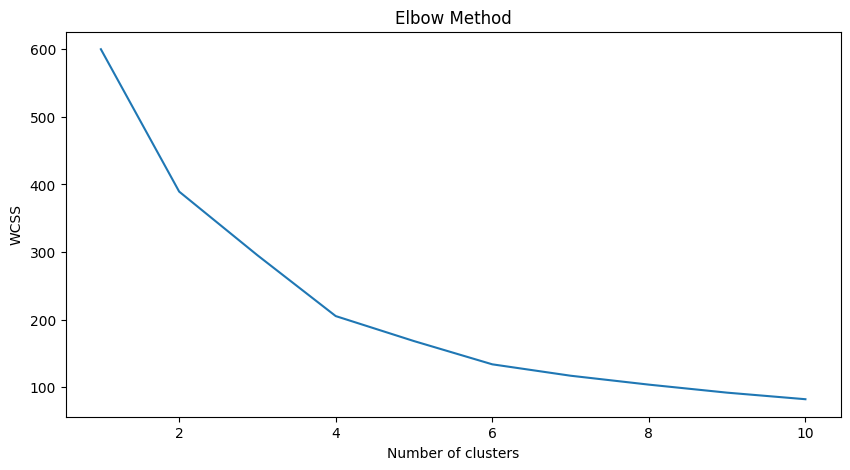

In [21]:
# Elbow method to determine the number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [22]:
# Applying KMeans with the optimal number of clusters (let's assume it's 5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Adding cluster labels to the original dataset
data['Cluster'] = clusters


In [26]:
# Applying KMeans with the optimal number of clusters (let's assume it's 5)
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Adding cluster labels to the original dataset
data['Cluster'] = clusters


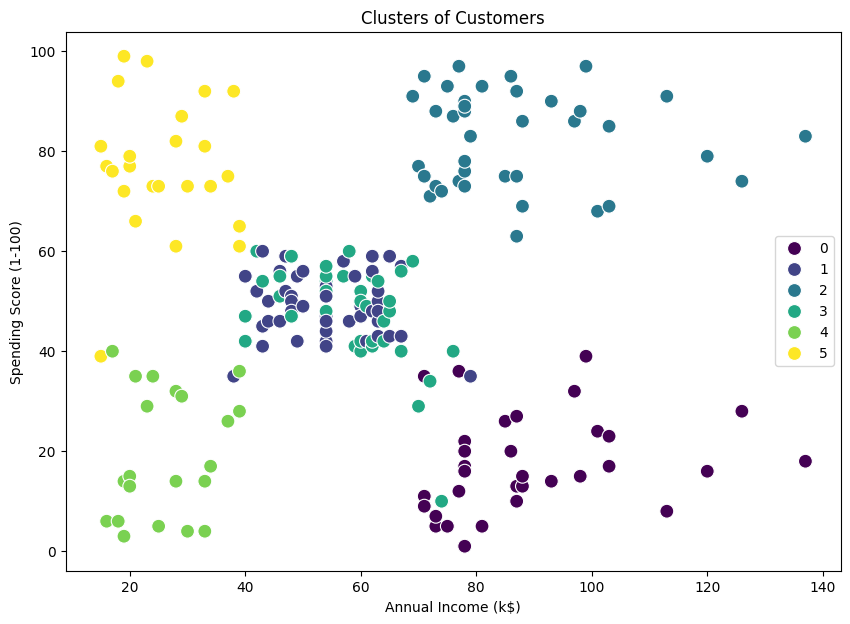

In [27]:
# Visualizing the clusters
plt.figure(figsize=(10,7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [28]:
# Analyzing the segments
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features.columns)
cluster_centers_df['Cluster'] = range(0, len(cluster_centers_df))

print("Cluster Centers:")
print(cluster_centers_df)

# Descriptive statistics for each cluster
numeric_data = data.select_dtypes(include=[np.number])  # Selecting only numeric columns
numeric_data['Cluster'] = data['Cluster']  # Adding the cluster column back to numeric data
cluster_descriptions = numeric_data.groupby('Cluster').mean().reset_index()

print("Cluster Descriptions:")
print(cluster_descriptions)

Cluster Centers:
         Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0  41.939394           88.939394               16.969697        0
1  56.333333           54.266667               49.066667        1
2  32.692308           86.538462               82.128205        2
3  26.684211           57.578947               47.789474        3
4  45.523810           26.285714               19.380952        4
5  25.250000           25.833333               76.916667        5
Cluster Descriptions:
   Cluster  CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
0        0  165.303030  41.939394           88.939394               16.969697
1        1   83.777778  56.333333           54.266667               49.066667
2        2  162.000000  32.692308           86.538462               82.128205
3        3   92.552632  26.684211           57.578947               47.789474
4        4   23.190476  45.523810           26.285714               19.380952
5        5   23.041667  25.2500